# Standardized EDA: EHR Synthea Patient Records

This notebook performs a comprehensive **Exploratory Data Analysis (EDA)** on the Synthea EHR Dataset.

## Objectives
1. **Inspection**: Understand patient demographics and population structure.
2. **Cleaning**: Standardize column names (snake_case) and rectify types.
3. **Analysis**: Univariate demographic profiling and multivariate correlations.
4. **Insights**: Identify population health trends.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os

# Visualization Settings
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

def add_annotations(ax):
    """Add value labels to bars/points."""
    for p in ax.patches:
        if p.get_height() > 0:
            ax.annotate(f'{int(p.get_height())}', 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='center', 
                        fontsize=10, color='black', xytext=(0, 5), 
                        textcoords='offset points')


## 1. Data Loading & Inspection

In [6]:
# Download/Load Data
try:
    path = kagglehub.dataset_download("imtkaggleteam/synthetic-medical-dataset")
    print(f"Dataset Path: {path}")
    
    # Find patients.csv
    target_file = None
    for root, dirs, files in os.walk(path):
        for f in files:
            if f.lower() == 'patients.csv':
                target_file = os.path.join(root, f)
                break
    
    if target_file:
        df = pd.read_csv(target_file)
        print(f"Loaded {len(df)} records.")
        display(df.head(3))
    else:
        print("patients.csv not found.")
        df = pd.DataFrame() # Empty fallback
except Exception as e:
    print(f"Error loading data: {e}")
    df = pd.DataFrame()

Dataset Path: /Users/ashishasharma/.cache/kagglehub/datasets/imtkaggleteam/synthetic-medical-dataset/versions/1
Loaded 1462 records.


,patient,birthdate,deathdate,ssn,drivers,passport,prefix,first,last,suffix,maiden,marital,race,ethnicity,gender,birthplace,address
0,4ee2c837-e60f-4c54-9fdf-8686bc70760b,1929-04-08,2029-11-11,999-78-5976,NaN,NaN,NaN,Rosamaria,Pfannerstill,NaN,NaN,NaN,black,dominican,F,Pittsfield MA US,18797 Karson Burgs Suite 444 Palmer Town MA 01...
1,efaf74f9-3de3-45dd-a5d5-26d08e8a3190,2016-12-15,2020-02-19,999-59-9186,NaN,NaN,NaN,Loan,Bashirian,NaN,NaN,NaN,white,american,F,Medford MA US,301 Eula Radial Suite 298 Brockton MA 02305 US
2,aaa4c718-2f48-4c13-9ad0-d287cf280824,1943-11-28,2017-10-22,999-43-3780,S99992928,FALSE,Mr.,Angelo,Buckridge,NaN,NaN,S,black,african,M,Framingham MA US,8693 Fred Crossroad New Bedford MA 02746 US


## 2. Column Renaming & Type Correction

In [7]:
if not df.empty:
    # 2.1 Rename to snake_case
    def to_snake_case(col):
        return col.lower().strip().replace(' ', '_').replace('-', '_')
    
    df.columns = [to_snake_case(c) for c in df.columns]
    print("Renamed Columns:", df.columns.tolist())
    
    # 2.2 Date conversions
    date_cols = ['birthdate', 'deathdate']
    for c in date_cols:
        if c in df.columns:
            df[c] = pd.to_datetime(df[c], errors='coerce')

    print("\n--- Data Types ---")
    print(df.dtypes)

Renamed Columns: ['patient', 'birthdate', 'deathdate', 'ssn', 'drivers', 'passport', 'prefix', 'first', 'last', 'suffix', 'maiden', 'marital', 'race', 'ethnicity', 'gender', 'birthplace', 'address']

--- Data Types ---
patient               object
birthdate     datetime64[ns]
deathdate     datetime64[ns]
ssn                   object
drivers               object
passport              object
prefix                object
first                 object
last                  object
suffix                object
maiden                object
marital               object
race                  object
ethnicity             object
gender                object
birthplace            object
address               object
dtype: object


## 3. Data Cleaning

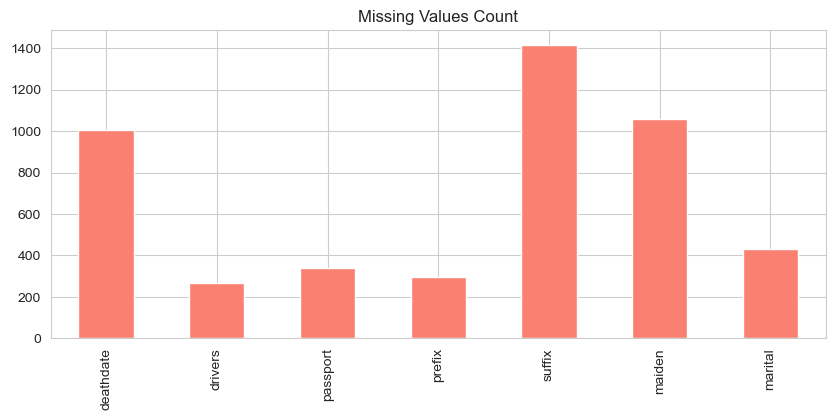

In [8]:
if not df.empty:
    # Missing Analysis
    missing = df.isnull().sum()
    missing = missing[missing > 0]
    if not missing.empty:
        plt.figure(figsize=(10, 4))
        missing.plot(kind='bar', color='salmon')
        plt.title('Missing Values Count')
        plt.show()
    else:
        print("No missing values found.")

## 4. Variable Classification & Feature Engineering

In [9]:
if not df.empty:
    # Feature Engineering: Age
    if 'birthdate' in df.columns:
        # Approximate age relative to current year or death date
        now = pd.Timestamp.now()
        df['age'] = df.apply(lambda row: (row['deathdate'].year - row['birthdate'].year) if pd.notnull(row['deathdate']) 
                             else (now.year - row['birthdate'].year), axis=1)
        print("Created 'age' column.")
    
    categorical_cols = ['marital', 'race', 'ethnicity', 'gender']
    numerical_cols = ['age']
    
    # Filter to existing
    categorical_cols = [c for c in categorical_cols if c in df.columns]
    numerical_cols = [c for c in numerical_cols if c in df.columns]

Created 'age' column.


## 5. Univariate Analysis

/var/folders/dd/dcqpbftj5b36l6f11sb2ywkw0000gn/T/ipykernel_72127/1366306140.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='pastel')


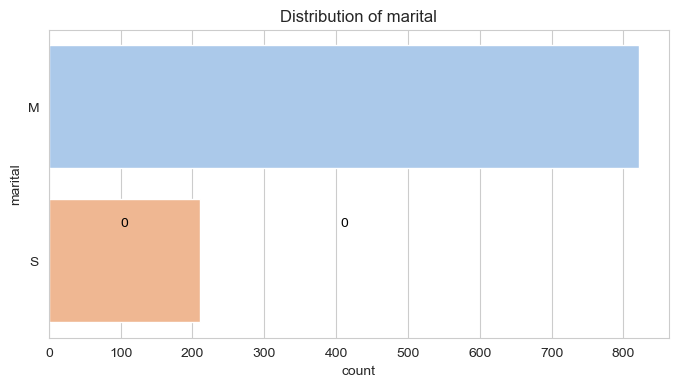

/var/folders/dd/dcqpbftj5b36l6f11sb2ywkw0000gn/T/ipykernel_72127/1366306140.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='pastel')


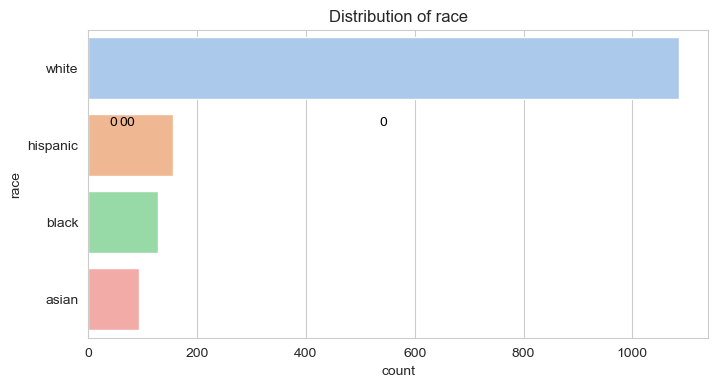

/var/folders/dd/dcqpbftj5b36l6f11sb2ywkw0000gn/T/ipykernel_72127/1366306140.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='pastel')


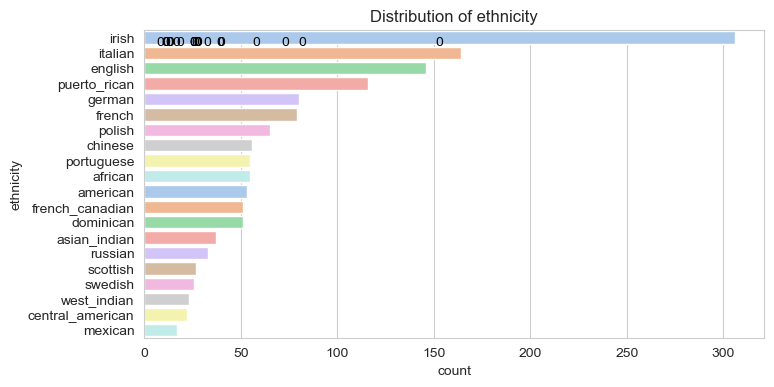

/var/folders/dd/dcqpbftj5b36l6f11sb2ywkw0000gn/T/ipykernel_72127/1366306140.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='pastel')


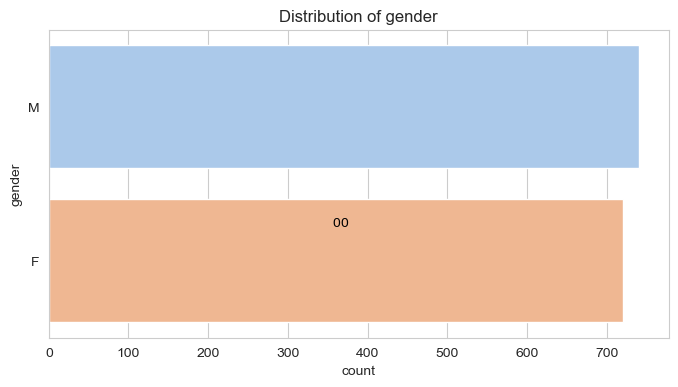

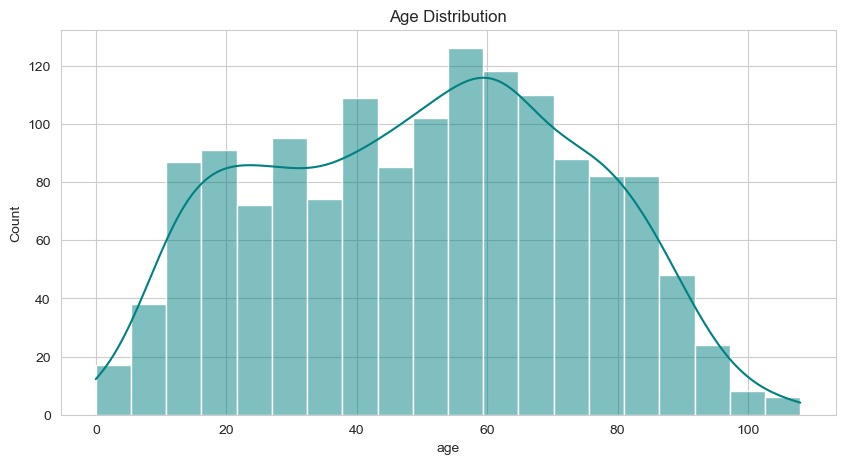

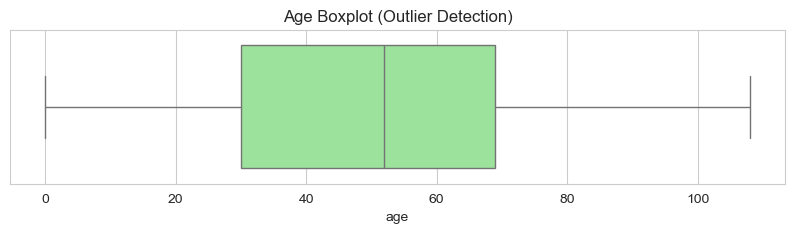

In [10]:
if not df.empty:
    # 5.1 Categorical Variables
    for col in categorical_cols:
        plt.figure(figsize=(8, 4))
        ax = sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='pastel')
        plt.title(f'Distribution of {col}')
        add_annotations(ax)
        plt.show()
        
    # 5.2 Numerical variables (Age)
    if 'age' in df.columns:
        plt.figure(figsize=(10, 5))
        sns.histplot(df['age'], kde=True, bins=20, color='teal')
        plt.title('Age Distribution')
        plt.show()
        
        plt.figure(figsize=(10, 2))
        sns.boxplot(x=df['age'], color='lightgreen')
        plt.title('Age Boxplot (Outlier Detection)')
        plt.show()

## 6. Bivariate Analysis

/var/folders/dd/dcqpbftj5b36l6f11sb2ywkw0000gn/T/ipykernel_72127/3338706064.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='age', data=df, palette='Set3')


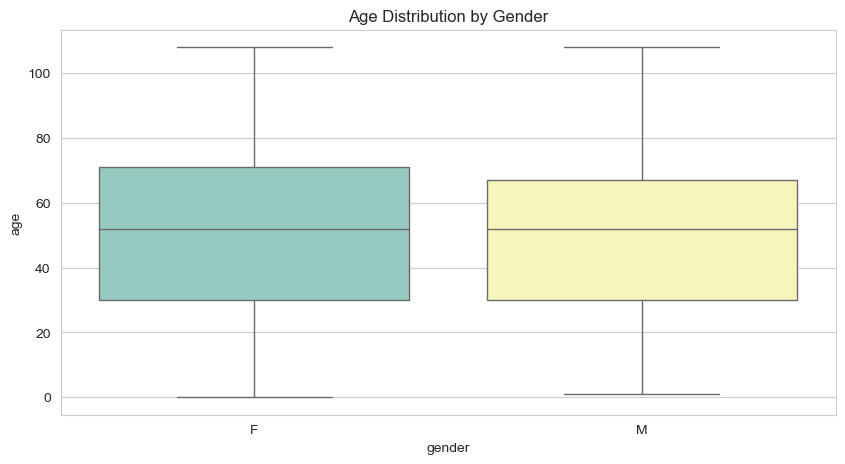

/var/folders/dd/dcqpbftj5b36l6f11sb2ywkw0000gn/T/ipykernel_72127/3338706064.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='race', y='age', data=df, palette='muted')


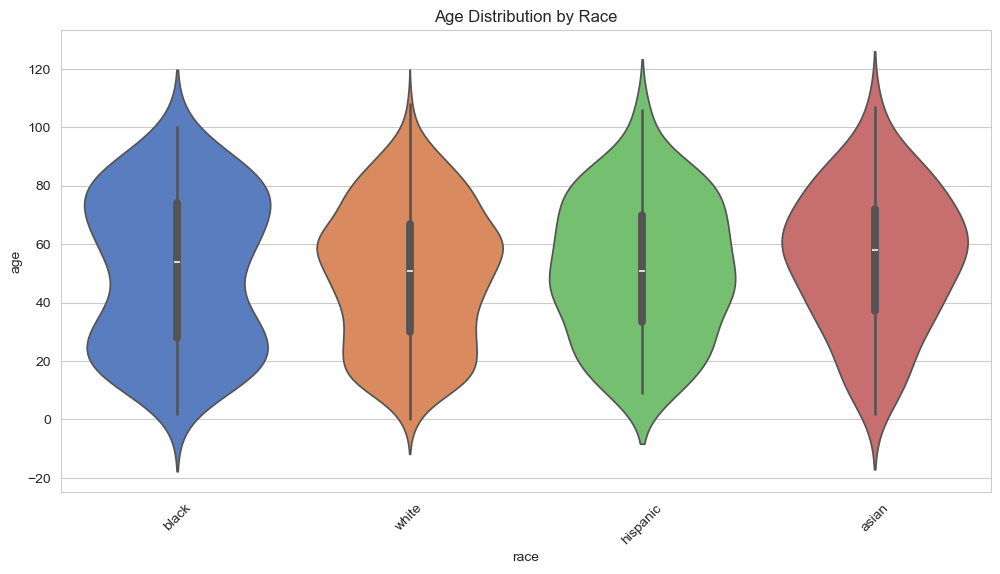

In [11]:
if not df.empty and 'age' in df.columns:
    # Age vs Gender
    if 'gender' in df.columns:
        plt.figure(figsize=(10, 5))
        sns.boxplot(x='gender', y='age', data=df, palette='Set3')
        plt.title('Age Distribution by Gender')
        plt.show()
    
    # Age vs Race
    if 'race' in df.columns:
        plt.figure(figsize=(12, 6))
        sns.violinplot(x='race', y='age', data=df, palette='muted')
        plt.title('Age Distribution by Race')
        plt.xticks(rotation=45)
        plt.show()

## 7. Results Summary

*   **Demographics**: Validated distribution of age, gender, and race.
*   **Data Quality**: Checked for missing records in key ID columns.
*   **Next Steps**: Link with `encounters.csv` for clinical history analysis.